# ***Filtro de Hodrick y Prescoot para el PBI Peruano***

*El filtro de holdrick y prescott es usado para hallar la tendencia en una serie en el caso del **PBI** peruano nos*
*si estamos en una recesión o en un auje*

formula: \
$$
y_{t} = s_{t} + c_{t} \\
s_{t}= tendecia de la serie\\
c_{t}= ciclo 
$$


Formalmente, la tendencia la define por:
$$
s^{HP}_i={argmin\sum_{t=2}^{T}(y_t-s_t)^2+\lambda\sum_{t=2}^{T-1}[(s_{t+1}-s_{t})-(s_t-s_{})]^2} \\
={argmin\sum_{t=2}^{T}(y_t-s_t)^2+\lambda\sum_{t=2}^{T-1}(s_{t+1}-2s_t+s_{t-1})^2}
$$

Formalmente, la tendencia la define por:
$$
s^{HP}_i={argmin\sum_{t=2}^{T}(y_t-s_t)^2+\lambda\sum_{t=2}^{T-1}[(s_{t+1}-s_{t})-(s_t-s_{})]^2} \\
={argmin\sum_{t=2}^{T}(y_t-s_t)^2+\lambda\sum_{t=2}^{T-1}(s_{t+1}-2s_t+s_{t-1})^2}
$$

$$
S= \begin{equation}
      \begin{pmatrix}
         s_{1}\\
         s_{2}\\
         s_{3}\\
         \vdots\\  
         s_{T}
       \end{pmatrix}
    \end{equation}
$$

$$
A_{T-2xT}=
\begin{equation}
     \begin{pmatrix}
       1 & -2  &1 & 0 & \cdots & 0&0&0&0\\
       0 & 1  &-2 & 1 & \cdots & 0&0&0&0\\\\
       \cdots & \cdots & \cdots & \cdots & \cdots&0&0&0&0 \\
        0 & 0  &0 & 0 & \cdots & 0&1&-2&1\\
      \end{pmatrix}
    \end{equation}
$$

$$
s^{HP}_i=
{argmin\sum_{t=2}^{T}(y_t-s_t)^2+\lambda\sum_{t=2}^{T-1}(s_{t+1}-2s_t+s_{t-1})^2} \\
argmin[ (Y-S)^t(Y-S)+\lambda(AS)^t(AS)] \\
argmin[Y^tY-2Y^tS+S^t(I+\lambda A_tA)S] \\
-2Y+2(I+\lambda A^tA)S=0
$$

Then, the **HP** filter is: \
$$
S^{HP}=(I+\lambda A^tA)^{-1}Y \\
C^{HP}=T-S^{HP}=[I-(I+\lambda A^tA)^{-1}]Y
$$

* EL resultado es muy sensible a la escogencia de $\lambda$
* Como regla, $\lambda$ se escoge según la frecuencia de los datos: 
 * Anuales=100
 * Trimestrales=1600
 * Mensulaes=14400
 

> Nota: Este filtro tiene varias desventajas, según Hamilton **2017** propone varias criticas y nos da a conocer que el mejor modelo a este puede ser un modelo autorregresivo de orden 4 $AR(4)$ 

# **Desarrollo del ejemplo para la economia peruana**

In [1]:
import statsmodels.api as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

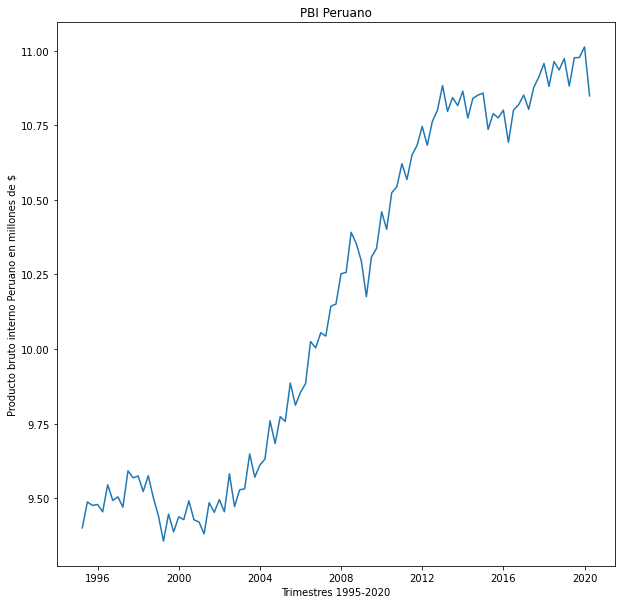

In [2]:
data= pd.read_excel("C:/Users/daffy/Downloads/Trimestral-20200817-225232.xlsx",skiprows=1)
data=data.iloc[:,1:2]
fechas= pd.date_range(start="1995",periods=len(data),freq="Q")
data.index=fechas
data=np.log(data)
fig,x0=plt.subplots(figsize=(10,10))
x0.plot(data)
x0.set_xlabel("Trimestres 1995-2020")
x0.set_ylabel("Producto bruto interno Peruano en millones de $")
plt.title("PBI Peruano")
plt.show()

In [4]:
hpf1=st.tsa.filters.hpfilter(data,14400)
hpf2=st.tsa.filters.hpfilter(data,1600)
hpf3=st.tsa.filters.hpfilter(data,100)

In [5]:
filtros=pd.DataFrame({"hpf1":hpf1[1],"hpf2":hpf2[1],"hpf":hpf3[1]})
base=pd.concat((data,filtros),axis=1)

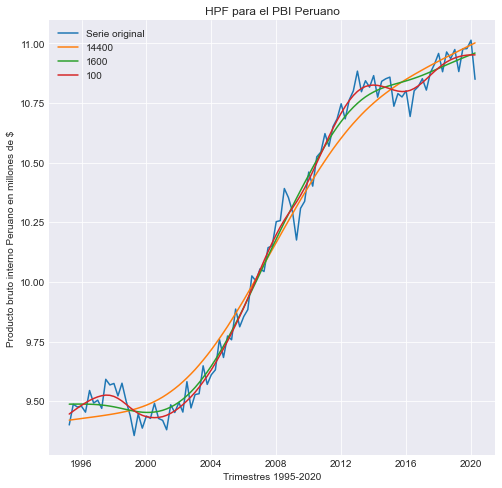

In [11]:
plt.style.use("seaborn-darkgrid")
fig,x0=plt.subplots(figsize=(8,8))
x0.plot(base)
x0.legend(("Serie original","14400","1600","100" ))
x0.set_xlabel("Trimestres 1995-2020")
x0.set_ylabel("Producto bruto interno Peruano en millones de $")
plt.title("HPF para el PBI Peruano")
plt.show()

# Un modelo **$AR(4)$**  VS el HPF

In [10]:
from statsmodels.tsa.arima_model import ARMA

In [44]:
import atita_tools as at
import daffy_tools as df

In [17]:
data.columns=["PBI"]

In [18]:
modelo= ARMA(data,order=(4,0))

In [19]:
resultados=modelo.fit(method="mle")
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    PBI   No. Observations:                  101
Model:                     ARMA(4, 0)   Log Likelihood                 140.298
Method:                           mle   S.D. of innovations              0.059
Date:                Tue, 18 Aug 2020   AIC                           -268.597
Time:                        17:22:16   BIC                           -252.906
Sample:                    03-31-1995   HQIC                          -262.245
                         - 03-31-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1534      0.679     14.957      0.000       8.823      11.484
ar.L1.PBI      0.8197      0.096      8.518      0.000       0.631       1.008
ar.L2.PBI      0.3830      0.113      3.383      0.001       0.161       0.605
ar.L3.PBI     -0.5586      0.114     -4.915      0.000      -0.781      -0.336
ar.L4.PBI      0.3534      0.096      3.692      0.000       0.166       0.541
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1428           -0.0000j            1.1428           -0.5000
AR.2            1.0019           -0.0000j            1.0019           -0.0000
AR.3            0.8609           -1.3154j            1.5721           -0.1578
AR.4            0.8609           +1.3154j            1.5721            0.1578
-----------------------------------------------------------------------------
"""

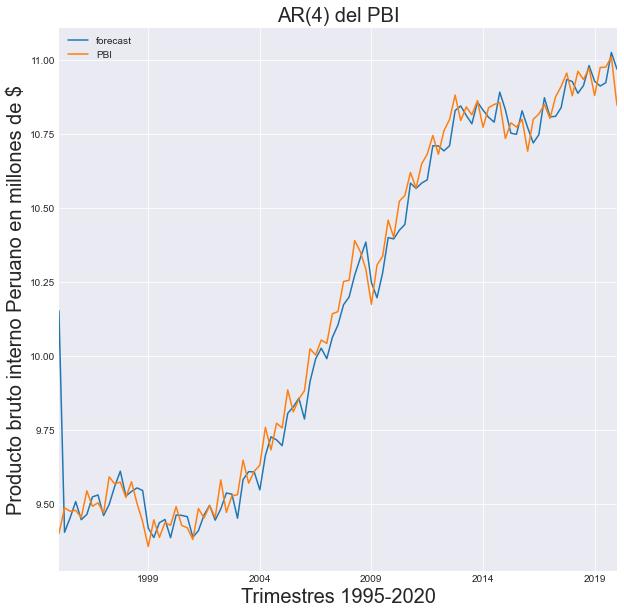

In [42]:
plt.style.use("seaborn-darkgrid")
fig,x0=plt.subplots(figsize=(10,10))
resultados.plot_predict(ax=x0)
x0.set_title("AR(4) del PBI",size=20)
x0.set_xlabel("Trimestres 1995-2020",size=20)
x0.set_ylabel("Producto bruto interno Peruano en millones de $",size=20)
plt.show()